# Short-term vacation rental with Machine Learning
- March 3rd, 2020

## Import required modules and load data file

In [1]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn; sn.set(color_codes=True)
from sklearn.model_selection import train_test_split

import os, sys
from os import listdir
from os.path import isfile, join

In [2]:
fn = '2020-02-27 BigBearLake'
#fn = '2020-02-20_HalfMoonBay'
#fn='2020-02-27 Fairfield'
#fn = '2020_03_02_Vallejo'
#fn = '2020_03_02_AmericanCanyon'
#fn = '2020-02-27 Kissimmee'

finished_path = os.getcwd()
fullname = join(finished_path, fn + '_filled.csv')
fullname

'/Users/lilming/Desktop/DataMimo/airdna/project3/2020-02-27 BigBearLake_filled.csv'

In [3]:
df = pd.read_csv(fullname)
df['HOA/MONTH']=df['HOA/MONTH'].fillna(0)
df['CITY']=df['CITY'].str.upper()
df['LOCATION']=df['LOCATION'].str.upper()
df.columns

Index(['Unnamed: 0', 'Multiple', 'Revenue', 'Daily Rate', 'Occupancy',
       'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE',
       'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'LOCATION',
       'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH',
       'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [4]:
#select only the useful columns
columns_to_keep = ['Multiple',
                   'Revenue',
                   'Daily Rate',
                   'Occupancy',
                   'PROPERTY TYPE',
                   'CITY',
                   'STATE OR PROVINCE',
                   'PRICE',
                   'ZIP OR POSTAL CODE',
                   'BEDS',
                   'BATHS',
                   'LOCATION',
                   'SQUARE FEET',
                   'LOT SIZE',
                   'YEAR BUILT',
                   'HOA/MONTH',
                   'LATITUDE',
                   'LONGITUDE']
feature_columns = ['Occupancy',
                   'PRICE',
                   'ZIP OR POSTAL CODE',
                   'BEDS',
                   'BATHS',
                   'SQUARE FEET',
                   'LOT SIZE',
                   'YEAR BUILT',
                   'HOA/MONTH',
                   'LATITUDE',
                   'LONGITUDE']
df = df[columns_to_keep]
print('df shape: ', df.shape)
#check if the df colums are correct
df.columns

df shape:  (157, 18)


Index(['Multiple', 'Revenue', 'Daily Rate', 'Occupancy', 'PROPERTY TYPE',
       'CITY', 'STATE OR PROVINCE', 'PRICE', 'ZIP OR POSTAL CODE', 'BEDS',
       'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
       'HOA/MONTH', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [5]:
#drop the NAN rows
#SF stands for single family residential
sF=df.dropna()
sF.shape
print(sF)

      Multiple  Revenue  Daily Rate  Occupancy              PROPERTY TYPE  \
0    12.425971  27354.0       212.0       0.35  Single Family Residential   
1    19.786609  30273.0       221.0       0.38  Single Family Residential   
2     9.537804  26201.0       213.0       0.34  Single Family Residential   
3     8.478325  33910.0       198.0       0.47  Single Family Residential   
4    32.581908  27592.0       218.0       0.35  Single Family Residential   
..         ...      ...         ...        ...                        ...   
152  88.710782  29196.0       190.0       0.42  Single Family Residential   
153  24.601289  29470.0       224.0       0.36  Single Family Residential   
154  93.604772  28834.0       225.0       0.35  Single Family Residential   
155  16.603447  30054.0       223.0       0.37  Single Family Residential   
156   9.542528  35106.0       228.0       0.42  Single Family Residential   

              CITY STATE OR PROVINCE    PRICE  ZIP OR POSTAL CODE  BEDS  \


### 2.1 dummy linnear regression to check

**data.info()**: we have

The training score is 0.963 and the test score is 0.826. Not bad. 
Let's continue and figure out what we can do to improve
<img src="images/dummyLinRegression.png">

In [6]:
from sklearn.linear_model import LinearRegression

## INPUT YOUR CODES HERE
X = sF[feature_columns]
X = pd.get_dummies(X)
#y = sF['Daily Rate']
y = sF['Multiple']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =4)

model = LinearRegression()
fit=model.fit(X_train,y_train)
## END OF YOUR CODES

print('R-squared score (training): {:.3f}'.format(fit.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(fit.score(X_test, y_test)))


R-squared score (training): 0.989
R-squared score (test): 0.996


# Machine learning flowchart

## 4.1 Linear Regression:
- First Create train-test split


In [82]:
print(sF)

     Occupancy    PRICE  ZIP OR POSTAL CODE  BEDS  BATHS  SQUARE FEET  \
0         0.35   339900               92315     2   2.00         1015   
1         0.38   599000               92315     5   4.00         2264   
2         0.34   249900               92315     1   1.00          480   
3         0.47   287500               92315     2   2.00          972   
4         0.35   899000               92315     4   4.00         3816   
..         ...      ...                 ...   ...    ...          ...   
152       0.42  2590000               92315     2   1.00          904   
153       0.36   725000               92315     2   1.50          936   
154       0.35  2699000               92315     6   6.00         4215   
155       0.37   499000               92315     4   3.00         1712   
156       0.42   335000               92315     2   1.75          960   

     LOT SIZE  YEAR BUILT  HOA/MONTH   LATITUDE   LONGITUDE  
0      2500.0        2019        0.0  34.237012 -116.871716  

In [40]:
from sklearn.linear_model import LinearRegression

## Input your codes here
### train_test_split

X = sF[feature_columns]
y = sF['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =4)
linreg = LinearRegression()
linreg.fit(X_train,y_train)
### LinearRegression

## end of your codes

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 2.23847222e-10  1.00000000e+00  2.11194991e-11 -5.45080631e-11
 -2.94476315e-14  4.72672426e-16  3.12601449e-13  1.05217623e-14
 -8.60999945e-10 -5.76997641e-11]
linear model intercept (b): 0.000
R-squared score (training): 1.000
R-squared score (test): 1.000


## 4.2 Lasso (Least Absolute Shrinkage and Selection Operator)

$${\displaystyle \min _{\beta}\left\{{\frac {1}{N}}\left\|y-X\beta \right\|_{2}^{2}+\alpha \|\beta \|_{1}\right\}}$$


In [43]:
from sklearn.linear_model import Lasso
## Input your codes here
### train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =4)
L1_penalty = 0.001
Lasso1 = Lasso(alpha=L1_penalty)
Lasso1.fit(X_train,y_train)
### LinearRegression

## end of your codes

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

# iterations: 49
Self score: 1.00



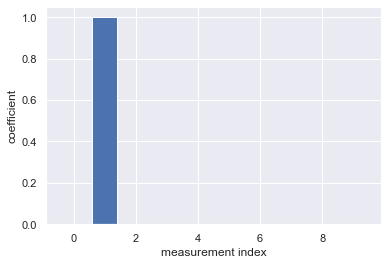

In [44]:
print('# iterations: %d' % Lasso1.n_iter_)
print('Self score: {:.2f}\n'
      .format(Lasso1.score(X, y)))
plt.figure()
plt.bar(range(X.columns.size), Lasso1.coef_)
plt.xlabel('measurement index')
plt.ylabel('coefficient');

### 4.2.1 Lasso with scaling the data
- It takes only 9 iterations after standardization
- Scaled the data will take care of some converging issues also


In [45]:
# Some data may have converge problem
# Try scaling the data
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)

X1_train, X1_test, y1_train, y1_test = train_test_split(X_norm, y, test_size=0.2,random_state =4)
L2_penalty = 0.001
Lasso2 = Lasso(alpha=L2_penalty)
Lasso2.fit(X1_train,y1_train)


### train_test_split
### LinearRegression

## end of your codes

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

# iterations: 9
Self score: 1.00



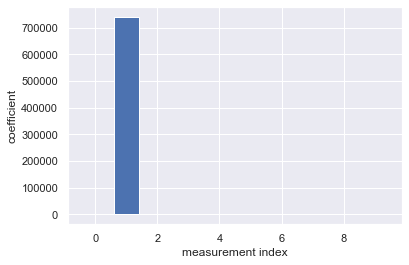

In [46]:
print('# iterations: %d' % Lasso2.n_iter_)
print('Self score: {:.2f}\n'
      .format(Lasso2.score(X_norm, y)))
plt.figure()
plt.bar(range(X.columns.size), Lasso2.coef_)
plt.xlabel('measurement index')
plt.ylabel('coefficient');

### 4.2.2 Lasso: What the more relevant measurement from this model

<img src="images/lassoMostRelevant.jpg">

In [50]:
## Input your codes here

coeffs = pd.Series(Lasso2.coef_, X.columns)
sorted_coeffs = coeffs.abs().sort_values(ascending=False)
sorted_coeffs.head(15)
## end of your codes

PRICE                      5.962987
LONGITUDE                  0.603490
HOA/MONTH                  0.555527
BEDS                       0.473347
Occupancy                  0.469171
LOCATION_GREEN VALLEY 2    0.412284
LOCATION_FAIRFIELD 3       0.408649
LOCATION_CORDELIA          0.165995
LOCATION_FAIRFIELD 7       0.085565
LOCATION_FAIRFIELD 6       0.064376
YEAR BUILT                 0.048487
LOCATION_GREEN VALLEY 1    0.033410
LOCATION_FAIRFIELD 4       0.028424
LOCATION_FAIRFIELD 2       0.026687
ZIP OR POSTAL CODE         0.000000
dtype: float64

## LEARNING CURVE

##### Learning Curve can help us to identify whether our model is underfitting or overfitting

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

feature_columns = ['Occupancy',
                   'PRICE',
                   'BEDS',
                   'BATHS',
                   'SQUARE FEET',
                   'LOT SIZE',
                   'YEAR BUILT',
                   'HOA/MONTH',
                   'LATITUDE',
                   'LONGITUDE']
df = df[feature_columns]
sF = df.dropna()
X = sF.drop(['PRICE'],axis =1)
y = sF['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# store the train and test score
train_score = []
test_score = []
for i in range(1, 158):
    # Reassign a new LinearRegression model during each iteration
    liner = LinearRegression()
    # use the previous i elements to train
    liner.fit(X_train[:i], y_train[:i])
    # make prediction based on the training set
    y_train_predict = liner.predict(X_train[:i])
    # using mean_squared_error
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    # based on the test prediction
    y_test_predict = liner.predict(X_test)
    # MSE agagin
    test_score.append(mean_squared_error(y_test, y_test_predict))

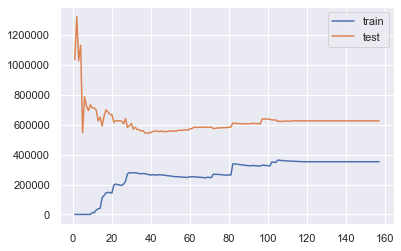

In [47]:
plt.plot([i for i in range(1, 158)],  np.sqrt(train_score), label="train")
plt.plot([i for i in range(1, 158)],  np.sqrt(test_score), label="test")
plt.legend()
plt.show()